# **Documentation**

## **Answer the questions**

###1-***Why a simple linear regression model (without any activation function) is not good for classification task, compared to Perceptron/Logistic regression?***

There are two things that explain why Linear Regression is not suitable for classification.

 `The first` one is that Linear Regression deals with continuous values whereas classification problems mandate discrete values.

`The second` problem is regarding the shift in threshold value when new data points are added. 

* Logistic regression provides discreet output

* the perceptron can be used as a binary classification model, defining a linear decision boundary. It finds the separating hyperplane that minimizes the distance between misclassified points and the decision boundary
---


###2- ***What's a decision tree and how it is different to a logistic regression model?***

`Decision Tree`: is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier

**Different to a logistic regression model**

1-Logistic Regression assumes that the data is linearly (or curvy linearly)
Decision Trees are non-linear classifiers

2-Categorical data works well with Decision Trees, while continuous data work well with Logistic Regression

3-Logistic Regression does not handle skewed classes well,Decision Trees handle skewed classes nicely if we let it grow fully.

4-Decision Trees works with missing values,
Logistic Regression does not handle missing values

---

###3- ***What's the difference between grid search and random search?***

* Random search differs from grid search in that we no longer provide an explicit set of possible values for each hyperparameter; rather, we provide a statistical distribution for each hyperparameter from which values are sampled. Essentially, we define a sampling distribution for each hyperparameter to carry out a randomized search

* Grid search is not very often used in practice because the number of models to train grows exponentially as you increase the number of hyperparameters to train. This can be very inefficient — both in computing power and time.


###4-***What's the difference between bayesian search and random search?***
`Random search`

* Try out a random subset 

* good enough

* Local optimal (within the given range)

* Efficient (less trials)

* Sklearn: model_selection.RandomizedSearchCV

`Bayesian Optimization`

* As an optimization problem

* Trial -> estimated error -> Bayesian model estimates the next 

* parameter to try -> trial -> repeat

* pip install bayesian-optimization





---

## **Problem Formulation**

**Define the problem**

`We need to predict the outcome of a specific speed dating session based on the profile of two people, so we can implement a recommendation system to better match people in speed dating events. but the given data has a lot of missing values that must be handled to perform the model well.`

**What is the input?**

`we have some features for each participant ,this will help us to know some information about Participants,and predict exactly`

**What is the output?** 

`The output is which the two people matches or not matched based on the features.`

**What data mining function is required?**

`a binary classification function`

**What could be the challenges?**
*  `The data have alot of missing value should be handled` 
* `we should select best classifier for classify more accurate` 
* `use feature selection to know what is the important features can give us high predict`
  
**What is the impact?**

`The recommendation system can select two person that perfectly match each other based on their answers in the application`
   
**What is an ideal solution?**
```
handleing of  missing data perfectly and select the best hyperparameters that gives high performance
in case of my trials i notice that the Xgbclassifier did this perfectly
```

---


### **Import libraries**

In [1]:
import numpy as np #used for working with arrays
import pandas as pd#Pandas is mainly used for data analysis
import matplotlib.pyplot as plt#is a cross-platform, data visualization and graphical plotting library
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline #pipeline is a way to codify and automate the workflow
from sklearn.impute import SimpleImputer #Imputation transformer for completing missing values.
from sklearn.preprocessing import StandardScaler, OneHotEncoder #Standardize features by removing the mean and scaling to unit variance.
# one hot encoding is essential process of converting the categorical to numeric
from sklearn.model_selection import train_test_split, GridSearchCV#Tuning the hyper-parameters
from xgboost.sklearn import XGBClassifier #Model binary classification
import warnings #handling warning 
warnings.filterwarnings('ignore')

### **Read Train file and Test file**

In [2]:
df1 = pd.read_csv('train.csv')# read train file 
print(df1.shape)#shape of train data
df2 = pd.read_csv('test.csv')#read test file 
df2['match'] = 0 #add column match to test file before concat
print(df2.shape)#shape of test data 

(5909, 192)
(2469, 192)


### **Concat Data**

In [3]:
#I concat train and test data to deal with all data and then I will split it
all_data= pd.concat([df1,df2],ignore_index=True, sort=False)
all_data

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
0,0,3,2,14,18,2,2.0,14,12,372.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2583
1,1,14,1,3,10,2,NaN,8,8,63.0,...,8.0,8.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,6830
2,1,14,1,13,10,8,8.0,10,10,331.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4840
3,1,38,2,9,20,18,13.0,6,7,200.0,...,9.0,8.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,5508
4,1,24,2,14,20,6,6.0,20,17,357.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,0,23,2,15,19,18,18.0,14,11,407.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7982
8374,0,5,1,13,9,4,4.0,4,8,339.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7299
8375,1,26,2,2,19,3,NaN,15,3,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1818
8376,0,19,2,9,20,11,11.0,9,2,215.0,...,7.0,12.0,12.0,9.0,NaN,NaN,NaN,NaN,NaN,937



```
As we see the data have a lot of missing values.
and have some object features should be handeled
```



## **Discreption of data**

In [4]:
all_data.dtypes # type of data 

gender        int64
idg           int64
condtn        int64
wave          int64
round         int64
             ...   
sinc5_3     float64
intel5_3    float64
fun5_3      float64
amb5_3      float64
id            int64
Length: 192, dtype: object

In [5]:
all_data.nunique()# unique value for all data

gender         2
idg           44
condtn         2
wave          21
round         15
            ... 
sinc5_3        9
intel5_3       7
fun5_3        10
amb5_3         9
id          8378
Length: 192, dtype: int64

In [6]:
all_data.info() #some information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 192 entries, gender to id
dtypes: float64(173), int64(11), object(8)
memory usage: 12.3+ MB


## **Search about null value**

In [7]:
from numpy.ma.core import array
#this return the first 30 columns have null value 
null_val = pd.DataFrame(all_data.isnull().sum())
null_val.columns = ['null_val']
null_val['percent_'] = round(null_val['null_val'] / len(all_data.index), 2) * 100
null_val.sort_values('percent_', ascending = False)[:30]#make dataframe and calc percent of null value for each columns

,null_val,percent_
num_in_3,7710,92.0
numdat_3,6882,82.0
expnum,6578,79.0
amb7_2,6423,77.0
sinc7_2,6423,77.0
shar2_3,6362,76.0
fun7_3,6362,76.0
intel7_3,6362,76.0
sinc7_3,6362,76.0
attr7_3,6362,76.0




```
As we see there are some features have above of 76 % 
```

`From the peek at the data we had above, there are a ton of fields with NaNs. A lot of NaN I'll just disregard these fields with over 76 % null values from the dataset`

##**Drop features have above of 76 %**

In [8]:
all_data = all_data.drop([
'num_in_3',
'numdat_3',
'expnum',	
'amb7_2',	
'sinc7_2',	
'shar2_3',	
'fun7_3',	
'intel7_3',	
'sinc7_3',	
'attr7_3',	
'shar7_2',	
'intel7_2',	
'fun7_2',	
'shar7_3',	
'attr7_2',	
'attr5_3',		
'sinc5_3',	
'intel5_3',	
'fun5_3',	
'amb5_3',	
'amb7_3'
]
, axis =1) 

In [9]:
all_data

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc2_3,intel2_3,fun2_3,amb2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,id
0,0,3,2,14,18,2,2.0,14,12,372.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2583
1,1,14,1,3,10,2,NaN,8,8,63.0,...,NaN,NaN,NaN,NaN,6.0,8.0,8.0,7.0,8.0,6830
2,1,14,1,13,10,8,8.0,10,10,331.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4840
3,1,38,2,9,20,18,13.0,6,7,200.0,...,8.0,8.0,8.0,8.0,8.0,9.0,8.0,8.0,6.0,5508
4,1,24,2,14,20,6,6.0,20,17,357.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,0,23,2,15,19,18,18.0,14,11,407.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7982
8374,0,5,1,13,9,4,4.0,4,8,339.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7299
8375,1,26,2,2,19,3,NaN,15,3,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1818
8376,0,19,2,9,20,11,11.0,9,2,215.0,...,8.0,7.0,8.0,6.0,9.0,7.0,12.0,12.0,9.0,937


### **Distribution of participants's ages**

Text(0, 0.5, 'Frequency')

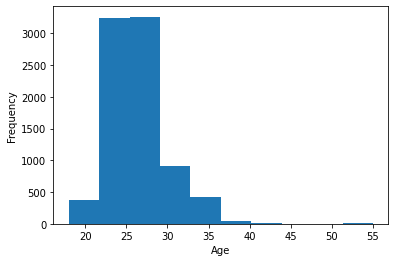

In [10]:
# distribution of participants's ages
age = all_data[np.isfinite(all_data['age'])]['age']
plt.hist(age.values)
plt.xlabel('Age')
plt.ylabel('Frequency')

`from this plot we see that  most of the participants were in their mid twenties to early thirties`.

In [11]:
# some simple transformation (always make a copy before you assign)
data = all_data.copy()

In [12]:
data=data.set_index('id')#set id as index
data

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3
id,,,,,,,,,,,,,,,,,,,,,
2583,0,3,2,14,18,2,2.0,14,12,372.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6830,1,14,1,3,10,2,NaN,8,8,63.0,...,NaN,NaN,NaN,NaN,NaN,6.0,8.0,8.0,7.0,8.0
4840,1,14,1,13,10,8,8.0,10,10,331.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5508,1,38,2,9,20,18,13.0,6,7,200.0,...,8.0,8.0,8.0,8.0,8.0,8.0,9.0,8.0,8.0,6.0
4828,1,24,2,14,20,6,6.0,20,17,357.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7982,0,23,2,15,19,18,18.0,14,11,407.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7299,0,5,1,13,9,4,4.0,4,8,339.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1818,1,26,2,2,19,3,NaN,15,3,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Categorical data**

In [13]:
#all categorical data on dataset
categorical_columns_selector = selector(dtype_include=object)#select columns that have object as type
categorical_columns = categorical_columns_selector(data)
data_categorical =data[categorical_columns]
data_categorical

,field,undergra,mn_sat,tuition,from,zipcode,income,career
id,,,,,,,,
2583,Ed.D. in higher education policy at TC,University of Michigan-Ann Arbor,"1,290.00","21,645.00","Palo Alto, CA",NaN,NaN,University President
6830,Engineering,NaN,NaN,NaN,"Boston, MA","2,021",NaN,Engineer or iBanker or consultant
4840,Urban Planning,"Rizvi College of Architecture, Bombay University",NaN,NaN,"Bombay, India",NaN,NaN,Real Estate Consulting
5508,International Affairs,NaN,NaN,NaN,"Washington, DC","10,471","45,300.00",public service
4828,Business,Harvard College,"1,400.00","26,019.00",Midwest USA,"66,208","46,138.00",undecided
...,...,...,...,...,...,...,...,...
7982,Neuroscience and Education,Columbia,"1,430.00","26,908.00",Hong Kong,0,NaN,Academic
7299,School Psychology,Bucknell University,"1,290.00","25,335.00","Erie, PA",NaN,NaN,school psychologist
1818,Law,NaN,NaN,NaN,Brooklyn,"11,204","26,482.00",Intellectual Property Attorney


In [14]:
# categorical encoding of field
data['field'] = data['field'].astype("category")

In [15]:
# categorical encoding of from
data['from'] = data['from'].astype("category")

In [16]:
# categorical encoding of undergra
data['undergra'] = data['undergra'].astype("category")

In [17]:
# categorical encoding of zipcode
data['zipcode'] = data['zipcode'].astype("category")

In [18]:
# categorical encoding of career
data['career'] = data['career'].astype("category")

In [19]:
# categorical encoding of mn_sat
data['mn_sat'] = data['mn_sat'].astype("category")

In [20]:
# categorical encoding of tuition
data['tuition'] = data['tuition'].astype("category")

In [21]:
# categorical encoding of income
data['income'] = data['income'].astype("category")

In [22]:
data.shape# check shape

(8378, 170)

In [23]:
data.info()#information of data after transform to category

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8378 entries, 2583 to 6691
Columns: 170 entries, gender to amb3_3
dtypes: category(8), float64(152), int64(10)
memory usage: 10.6 MB




---


### **Split Data**

In [24]:
#split data into train and test 
train_data_index = df1.shape[0]
train_data = data.iloc[:train_data_index]
train_data_cleaned_index = data.shape[0]
print(train_data.shape)
test_data_index = df2.shape[0]
print(test_data_index)
test_data= data.iloc[train_data_index :]
print(test_data.shape)
test_data= test_data.drop('match', axis=1)# drop match from test data

(5909, 170)
2469
(2469, 170)


In [25]:
train_data.info()#information for train data 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5909 entries, 2583 to 8149
Columns: 170 entries, gender to amb3_3
dtypes: category(8), float64(152), int64(10)
memory usage: 7.5 MB


In [26]:
test_data.info()#information for test data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2469 entries, 934 to 6691
Columns: 169 entries, gender to amb3_3
dtypes: category(8), float64(152), int64(9)
memory usage: 3.2 MB


In [27]:
X_train=train_data.drop('match',axis=1)#split train file to X_train and y_train

In [28]:
y_train=train_data['match']#label



---

In [29]:
#extract numeric features and categorical features names

numeric_features = list(X_train.select_dtypes(include=['float64', 'int64']))

categorical_features = list(X_train.select_dtypes(include=['category']))

print('numeric features:', numeric_features)
print('categorical features:', categorical_features)

numeric features: ['gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field_cd', 'race', 'imprace', 'imprelig', 'goal', 'date', 'go_out', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met', 'match_es', 'attr1_s', 'sinc1_s', 'in

# **Model_1**

In [30]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
# pipe line for numeric features preprocessing

pip_numeric = Pipeline(
    steps=[
        ('imputer', SimpleImputer()),
        ('scaler', StandardScaler())]
)

# pipe line for categorical features preprocessing

pip_categorical = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)
# define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', pip_numeric, numeric_features),
        ('cat', pip_categorical, categorical_features)
    ]
)
#My_classifier
xgb = XGBClassifier(silent=False, 
                      scale_pos_weight=1, 
                      colsample_bytree = 0.4,
                      learning_rate=0.02,
                       max_depth=11,
                      n_estimators=900,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      reg_alpha = 0.3,
                    )
# combine the preprocessor with the model as a full tunable pipeline
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
         ('selector', SelectKBest(mutual_info_classif, k=125)),
        ('my_classifier', xgb,)
    ]
)
full_pipline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'idg', 'condtn',
                                                   'wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age_o',
                                                   'race_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                   

In [31]:
full_pipline = full_pipline.fit(X_train,y_train)#fit X_train and y_train 



---


## **Trail1**

### **Grid Search with cross validation**

In [32]:
# here we specify the search space
param_grid = {
     'preprocessor__num__imputer__strategy': ['mean'],
      #'my_classifier__n_estimators': [900],           #I comment parameter to spead process after got parameter 
      #'my_classifier__max_depth':[11] ,
      #'my_classifier__learning_rate ' :[0.02]   
     
}
# cv=10 means ten-fold cross-validation

grid_search = GridSearchCV(
    full_pipline, param_grid, cv=10, verbose=1, n_jobs=2, 
    scoring='roc_auc')

grid_search.fit(X_train, y_train)
print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 10 folds for each of 1 candidates, totalling 10 fits
best score 0.8872048833125863
best score {'preprocessor__num__imputer__strategy': 'mean'}


* **Observations**



```
I used XGBClassifier Model and used grid search for tuning parameter
[colsample_bytree=0.4,learning_rate=0.02,max_depth=13,n_estimators=600,
reg_alpha=0.3,silent=False,subsample=0.8]  
I used kfold cross validation set k=5  
I found :
best score 0.8839822523555426  
score on leaderboard 0.88279 Public and 0.88989 private
```


---



```
I used XGBClassifier Model and used grid search for tuning parameter
[colsample_bytree=0.4,learning_rate=0.02,max_depth=11,n_estimators=600,
reg_alpha=0.3,silent=False,subsample=0.8]  
I used kfold cross validation set k=10  
I found :
best score 0.8856390103849305  
score on leaderboard 0.88324 Public and 0.89005 private
```

---



```
In this trail i add feature selection and choose k=100 
my model still XGBclassifier 
kfold with cv=10
parameter still as trail2                             
best score 0.8858435733121226
score  on leaderboard 0.88419 public 0.88885
```



---


```
In this trail i add feature selection and choose k=120 
my model still XGBclassifier 
kfold with cv=10
parameter still as trail2 but n_estimators:900                           
best score 0.8863755674641173
score on leader board 0.88580 Private 0.89054
```


---



```
last trail and this is the best
I change K=125 feature selection
best score 0.8872048833125863
score  on leaderboard 0.88584 public 0.89154 Private
```


---



In [33]:
# trained on the full training set. we can use it directly
y_pred1=grid_search.predict_proba(test_data)
y_pred1

array([[0.98775005, 0.01224994],
       [0.50905013, 0.49094987],
       [0.84801376, 0.15198621],
       ...,
       [0.9763    , 0.02370002],
       [0.99383616, 0.00616385],
       [0.99601316, 0.00398683]], dtype=float32)

In [34]:
submission = pd.DataFrame()#submission file

submission['id'] = df2['id']

submission['match'] = y_pred1[:,1]

submission.to_csv('sample_submission_walkthrough_2.csv', index=False)#submition file (sample_submission_walkthrough_2.csv)

# **Trail2**

### **Bayesian Search**

In [35]:
!pip install scikit-optimize#install optimize

In [36]:
from skopt import BayesSearchCV #use bayessearchcv for tuning hyperparameter with cross validation k=5

bayes_search = BayesSearchCV(full_pipline,param_grid, cv=5, verbose=1, n_jobs=2, n_iter=3,scoring='roc_auc')

bayes_search.fit(X_train,y_train)

print('best score {}'.format(bayes_search.best_score_))

print('best score {}'.format(bayes_search.best_params_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
best score 0.8860754628926835
best score OrderedDict([('preprocessor__num__imputer__strategy', 'mean')])


* **observations**

```
I used bayessearchcv for tuning hyperparameter with cross validation k=5 with
same paramer of trail5 to check score 
best score 0.8860754628926835
```



# **Trail3**

### **Random Search**

In [38]:
from sklearn.model_selection import  RandomizedSearchCV#tuning by randum search
#from sklearn.model_selection import PredefinedSplit
param_grid_rs = {
      'preprocessor__num__imputer__strategy': ['mean'],
      'my_classifier__n_estimators': [700,600,900],  
      'my_classifier__max_depth':[11,13,16] ,
      'my_classifier__learning_rate ' :[0.02,0.03,0.04]     
}

random_search = RandomizedSearchCV(
    full_pipline, param_grid_rs, cv=10, verbose=1, n_jobs=2, 
    # number of random trials
    n_iter=5,
    scoring='roc_auc')

random_search.fit(X_train, y_train)

print('best score {}'.format(random_search.best_score_))
print('best score {}'.format(random_search.best_params_))

Fitting 10 folds for each of 5 candidates, totalling 50 fits
best score 0.8873832053571402
best score {'preprocessor__num__imputer__strategy': 'mean', 'my_classifier__n_estimators': 700, 'my_classifier__max_depth': 11, 'my_classifier__learning_rate ': 0.03}


In [39]:
y_pred3=random_search.predict_proba(test_data)
y_pred3

array([[0.98306155, 0.01693846],
       [0.51121616, 0.48878384],
       [0.84016716, 0.1598328 ],
       ...,
       [0.9719833 , 0.0280167 ],
       [0.9914367 , 0.00856329],
       [0.9942778 , 0.00572225]], dtype=float32)

In [40]:
submission = pd.DataFrame()

submission['id'] = df2['id']

submission['match'] = y_pred3[:,1]

submission.to_csv('sample_submission_walkthrough_rs.csv', index=False)#submition file (sample_submission_walkthrough_2.csv)

* **observations** 
```
Random search
preprocessor__num__imputer__strategy': 'mean'
'my_classifier__n_estimators': 700,
'my_classifier__max_depth': 11,
'my_classifier__learning_rate ': 0.03
public:0.88615 private:0.89139





---


# **Trail4**

##**Model_2**

`I used Model GradientBoostingClassifier`

In [47]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.ensemble import GradientBoostingClassifier#Model for classification
# pipe line for numeric features preprocessing

pip_numeric = Pipeline(
    steps=[
        ('imputer', SimpleImputer()),
        ('scaler', StandardScaler())]
)

# pipe line for categorical features preprocessing

pip_categorical = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)
# define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', pip_numeric, numeric_features),
        ('cat', pip_categorical, categorical_features)
    ]
)
#My_classifier
model = GradientBoostingClassifier( min_samples_split=500,max_features='sqrt',subsample=0.8,random_state=42,max_depth=11,n_estimators=900,learning_rate=0.02)
# combine the preprocessor with the model as a full tunable pipeline
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
         ('selector', SelectKBest(mutual_info_classif, k=125)),
        ('my_classifier', model)
    ]
)
full_pipline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'idg', 'condtn',
                                                   'wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age_o',
                                                   'race_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                   

In [48]:
param_grid = {
      'preprocessor__num__imputer__strategy': ['mean'], 
      #'my_classifier__max_depth':[6,8,10] ,
      #'my_classifier__learning_rate ' :[0.002,0.02,0.04,0.06]   
}

### **Grid search**

In [49]:
grid_search = GridSearchCV(
    full_pipline, param_grid, cv=10, verbose=1, n_jobs=2, 
    scoring='roc_auc')

grid_search.fit(X_train, y_train)
print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 10 folds for each of 1 candidates, totalling 10 fits
best score 0.8866311262294928
best score {'preprocessor__num__imputer__strategy': 'mean'}


In [50]:
y_pred4=grid_search.predict_proba(test_data)
y_pred4

array([[0.95841152, 0.04158848],
       [0.64756472, 0.35243528],
       [0.7495133 , 0.2504867 ],
       ...,
       [0.93315274, 0.06684726],
       [0.97896431, 0.02103569],
       [0.97478453, 0.02521547]])

In [53]:
submission = pd.DataFrame()

submission['id'] = df2['id']

submission['match'] = y_pred4[:,1]

submission.to_csv('sample_submission_walkthrough_4.csv', index=False)#submition file (sample_submission_walkthrough_4.csv)

* **observations**
```
I used model GradientBoostingClassifier
with Parameter [
min_samples_split=500
max_features='sqrt'
subsample=0.8 
random_state=42
max_depth=11
n_estimators=900
learning_rate=0.02]
feature selection with k=125
Puplic score 0.88474 Private 0.89124
```



# **Trail5**

##**Model_3**


```
I used Model ExtraTreesClassifier
```



In [69]:
from sklearn.ensemble import ExtraTreesClassifier
# pipe line for numeric features preprocessing

pip_numeric = Pipeline(
    steps=[
        ('imputer', SimpleImputer()),
        ('scaler', StandardScaler())]
)

# pipe line for categorical features preprocessing

pip_categorical = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)
# define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', pip_numeric, numeric_features),
        ('cat', pip_categorical, categorical_features)
    ]
)
#My_classifier
clf = ExtraTreesClassifier(n_estimators=900, n_jobs=4, min_samples_split=25,
                            min_samples_leaf=35)
# combine the preprocessor with the model as a full tunable pipeline
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
         ('selector', SelectKBest(mutual_info_classif, k=125)),
        ('my_classifier', clf)
    ]
)
full_pipline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'idg', 'condtn',
                                                   'wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age_o',
                                                   'race_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                   

### **Grid search**

In [71]:
param_grid = {
      'preprocessor__num__imputer__strategy': ['mean','median'], 
      'my_classifier__max_depth':[11,12,13] ,
      #'my_classifier__learning_rate ' :[0.002,0.02,0.04,0.06]   
}
grid_search = GridSearchCV(
    full_pipline, param_grid, cv=5, verbose=1, n_jobs=2, 
    scoring='roc_auc')

grid_search.fit(X_train, y_train)
print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
best score 0.8626363196657694
best score {'my_classifier__max_depth': 12, 'preprocessor__num__imputer__strategy': 'mean'}


 * **observations**
```
I used Model ExtraTreesClassifier
Parameter[
n_estimators=900
 n_jobs=4
 min_samples_split=25
 min_samples_leaf=35, max_depth=12]
 best score 0.8626363196657694
```

# **Trial6**

## **BayesSearch**

In [65]:
# pipe line for numeric features preprocessing

pip_numeric = Pipeline(
    steps=[
        ('imputer', SimpleImputer()),
        ('scaler', StandardScaler())]
)

# pipe line for categorical features preprocessing

pip_categorical = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)
# define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', pip_numeric, numeric_features),
        ('cat', pip_categorical, categorical_features)
    ]
)
#My_classifier
clf = ExtraTreesClassifier()
# combine the preprocessor with the model as a full tunable pipeline
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
         ('selector', SelectKBest(mutual_info_classif, k=125)),
        ('my_classifier', clf)
    ]
)
full_pipline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'idg', 'condtn',
                                                   'wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age_o',
                                                   'race_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                   

In [66]:
#set hyperparameters to tuning them
param_grid = {
      'preprocessor__num__imputer__strategy': ['mean','median'], 
      'my_classifier__max_depth':[10,11,12] , 
}

In [67]:
from skopt import BayesSearchCV #use bayessearchcv for tuning hyperparameter with cross validation k=5

bayes_search = BayesSearchCV(full_pipline,param_grid, cv=5, verbose=1, n_jobs=2, n_iter=3,scoring='roc_auc')

bayes_search.fit(X_train,y_train)

print('best score {}'.format(bayes_search.best_score_))

print('best score {}'.format(bayes_search.best_params_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
best score 0.8659915497445514
best score OrderedDict([('my_classifier__max_depth', 11), ('preprocessor__num__imputer__strategy', 'mean')])


* **observations**


```
I used Model ExtraTreesClassifier cv=5
and used BayesSearch without any parameter just mean and feature selection k=125
best score 0.8659915497445514
'my_classifier__max_depth':11
'preprocessor__num__imputer__strategy':'mean'
```




* **Conclusion**
```
From all trials I notice some notes:
the best classifier is XGBclassifier with hyperparamter
 1-silent=False
 2-scale_pos_weight=1
 3-colsample_bytree = 0.4
 4-learning_rate=0.02
 5-max_depth=11
 6-n_estimators=900
 7-subsample = 0.8
 8-objective='binary:logistic' 
 9-reg_alpha = 0.3

* **Notes**

```
1-XGBoost:
is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework
2-Gradient Boosting:
A special case of boosting where errors are minimized by gradient descent algorithm
3-XGBoost: 
Think of XGBoost as gradient boosting on ‘steroids’
(well it is called ‘Extreme Gradient Boosting’ for a reason!). 
It is a perfect combination of software and hardware optimization techniques
to yield superior results using less computing resources in the shortest amount of time
4- grid search is better  but it took alot of  time to give parameters 
5-Bayesian optimization methods
are efficient because they select hyperparameters in an informed manner. 
By prioritizing hyperparameters 
that appear more promising from past results,
Bayesian methods can find the best
hyperparameters in lesser time (in fewer iterations)
than both grid search and random search
```

* **Referances** 

```
`1-http://medium.com/analytics-vidhya/comparison-of-hyperparameter-tuning-algorithms-grid-search-
random-search-bayesia
n-optimization-5326aaef1bd1`
2-https://www.tomasbeuzen.com/post/scikit-learn-gridsearch-pipelines/
3-https://towardsdatascience.com/
https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d
```
